<a href="https://colab.research.google.com/github/Luciana-cloud/DEMENT_toy/blob/main/DEMENT_Test_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before starting the simulation, upload all the python scripts from the src directory of DEMENT. Then, create input and output directories. Upload the input files (climate.csv, enzyme_ea.csv, etc.) into the input folder.
Choose the original grid and output file.
The seed for the data: 20220211

# PRELIMINARY RUNS WITH DEMENT

50 Simulations of litter degradation, assuming 1/10 of the initial litter concentrations set in the original DEMENT. I assumed a simple community with 10 taxa for 3 years, and with only one entry of litter. The idea would be to use these outputs to get mean values to use for project 3 (potential calibration) and project 2 (getting values of the taxa to parameterize using the three methods of my ptt).

Importing the necessary modules and setting the working directory to input_folder. We run this once and we do not have to do it again, unless we want to rerun from zero again, and for that, we go to "Laufzeit" -- "Laufzeit neu starten"

In [ ]:
#..Load modules
import os
import sys
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from plotnine import *


from initialization import initialize_data
from grid import Grid
from output import Output
from utility import export

input_folder  = "input"   # input folder name
#...Set up the working directory
os.chdir(input_folder)

Run the loop. Set t to the number of simulations needed. The file will save the outcomes and the parameters.

In [ ]:
# Test of looping

t  = np.linspace(1,100,100)

outname_t     = {} 
respiration   = [] # 1
substrate     = []
monomer       = []
CUE           = []
enzyme        = []
microbes      = []
Uptake_Vmax0  = []
UptakeGenes   = [] # 8
Uptake_Km0    = []
EnzProdConsti_trait  = []
EnzProdInduci_trait  = []
OsmoProdConsti_trait = []
OsmoProdInduci_trait = []
OsmoGenes  = []
EnzGenes   = [] # 15
Vmax0      = []
Km0        = []
UptakeGenes_trait  = []
UptakeGenesCost    = []
TaxDroughtTol      = []
Microbes           = [] # 21
Microbes_pp        = []
MinRatios          = [] # 23
ReqEnz_dfA         = [] # 24

for i in t:
  out1 = {}
  out2 = {}
  out3 = {}
  out4 = {}
  out5 = {}
  out6 = {}
  out7 = {}
  out8 = {} #
  out9 = {} #
  out10 = {} #
  out11 = {} #
  out12 = {} #
  out13 = {} #
  out14 = {} #
  out15 = {} # 
  out16 = {} #
  out17 = {} #
  out18 = {} #
  out19 = {} #
  out20 = {} #
  out21 = {} #
  out22 = {} #
  out23 = {} #
  out24 = {} #
  outname_t[i]  = "20220221" + str(int(i))    # output file name and seed of Pseudo-RNG + "20220211"
  input_folder  = "input"   # input folder name 
  output_folder = "output"  # output folder name
  outname       = outname_t[i]
#outname       = "20220131"   # output file name and seed of Pseudo-RNG
#...Set up the working directory
#  os.chdir(input_folder)
  #...seed the pseudorandom number generator
  np.random.seed(int(outname[:]))

#...a few system constants
  runtime    = pd.read_csv('runtime.txt',header=None,index_col=0,sep='\t')
  pulse      = int(runtime.loc['pulse',1])         # number of pulses
  cycle      = int(runtime.loc['end_time',1])      # number of time steps in each pulse
  interval   = int(runtime.loc['interval',1])      # interval of time step to record outputs
  mic_reinit = True    # indicate reinitialization of microbial community

#...Initialize data by calling the Function: Initialize_Data()
  data_initialization = initialize_data(runtime)

#...Prepare for output by creating an instance of the Output class
  Output_init = Output(runtime,data_initialization)

#...Create an instance of the Grid class
  Ecosystem = Grid(runtime,data_initialization)

  #...Run the model
  for p in range(pulse):
    
      for i in range(p*cycle, (p+1)*cycle):
    
        # substrates degradation
          Ecosystem.degradation(p,i)
    
        # monomers uptake
          Ecosystem.uptake(p,i)
    
        # microbial metabolism
          Ecosystem.metabolism(i)
    
        # microbial death
          Ecosystem.mortality(i)
    
        # microbial reproduction and dispersal
          Ecosystem.reproduction(i)
    
        # output data using the "output" method in the Output class
          if i == 0:
              Output_init.output(Ecosystem,i)  # day 1
          elif i%interval==interval-1:
              Output_init.output(Ecosystem,i)  # interval
        
        # if only 1 pusle, skip all following lines within this loop
        #if pulse == 1:
        #    continue
        
        # output microbial mass of every iteration using the "microbes_df" method in the Output class
          Output_init.microbes_abundance(Ecosystem,i)
        
        # re-initialize microbial community in each new pulse
          if i == (p+1)*cycle-1:
              Ecosystem.repopulation(Output_init,i,mic_reinit)

# Look at the time-series of respiration
  out1[i] = Output_init.RespSeries
  out2[i] = Output_init.SubstratesSeries
  out3[i] = Output_init.MonomersSeries
  out4[i] = Output_init.CUE_system
  out5[i] = Output_init.EnzymesSeries
  out6[i] = Output_init.MicrobesSeries
  out7[i] = Output_init.Initialization["Uptake_Vmax0"] #
  out8[i] = Output_init.Initialization["UptakeGenes"]
  out9[i] = Output_init.Initialization["Uptake_Km0"]
  out10[i] = Output_init.Initialization["EnzProdConsti_trait"]
  out11[i] = Output_init.Initialization["EnzProdInduci_trait"]
  out12[i] = Output_init.Initialization["OsmoProdConsti_trait"]
  out13[i] = Output_init.Initialization["OsmoProdInduci_trait"]
  out14[i] = Output_init.Initialization["OsmoGenes"]
  out15[i] = Output_init.Initialization["EnzGenes"]
  out16[i] = Output_init.Initialization["Vmax0"]
  out17[i] = Output_init.Initialization["Km0"]
  out18[i] = Output_init.Initialization["UptakeGenes_trait"]
  out19[i] = Output_init.Initialization["UptakeGenesCost"]
  out20[i] = Output_init.Initialization["TaxDroughtTol"]
  out21[i] = Output_init.Initialization["Microbes"]
  out22[i] = Output_init.Initialization["Microbes_pp"]
  out23[i] = Output_init.Initialization["MinRatios"]
  out24[i] = Output_init.Initialization["ReqEnz"]

  #print(Output_init.RespSeries)
  respiration.append(out1)
  substrate.append(out2)
  monomer.append(out3)
  CUE.append(out4)
  enzyme.append(out5)
  microbes.append(out6)
  Uptake_Vmax0.append(out7)
  UptakeGenes.append(out8)
  Uptake_Km0.append(out9)
  EnzProdConsti_trait.append(out10)
  EnzProdInduci_trait.append(out11)
  OsmoProdConsti_trait.append(out12)
  OsmoProdInduci_trait.append(out13)
  OsmoGenes.append(out14)
  EnzGenes.append(out15)
  Vmax0.append(out16)
  Km0.append(out17)
  UptakeGenes_trait.append(out18)
  UptakeGenesCost.append(out19)
  TaxDroughtTol.append(out20)
  Microbes.append(out21)
  Microbes_pp.append(out22)
  MinRatios.append(out23)
  ReqEnz_dfA.append(out24)

  #if i==1:
    #breakpoint()

Before placement-- Bac_taxa= 10 Fun_taxa= 0
After placement-- Bac_taxa= 6 Fun_taxa= 0
After placement-- Bac_density= 0.09 Fun_density= 0.0
Before placement-- Bac_taxa= 10 Fun_taxa= 0
After placement-- Bac_taxa= 5 Fun_taxa= 0
After placement-- Bac_density= 0.07 Fun_density= 0.0
Before placement-- Bac_taxa= 10 Fun_taxa= 0
After placement-- Bac_taxa= 6 Fun_taxa= 0
After placement-- Bac_density= 0.08 Fun_density= 0.0
Before placement-- Bac_taxa= 10 Fun_taxa= 0
After placement-- Bac_taxa= 9 Fun_taxa= 0
After placement-- Bac_density= 0.19 Fun_density= 0.0
Before placement-- Bac_taxa= 10 Fun_taxa= 0
After placement-- Bac_taxa= 3 Fun_taxa= 0
After placement-- Bac_density= 0.04 Fun_density= 0.0
Before placement-- Bac_taxa= 10 Fun_taxa= 0
After placement-- Bac_taxa= 8 Fun_taxa= 0
After placement-- Bac_density= 0.11 Fun_density= 0.0
Before placement-- Bac_taxa= 10 Fun_taxa= 0
After placement-- Bac_taxa= 5 Fun_taxa= 0
After placement-- Bac_density= 0.06 Fun_density= 0.0
Before placement-- Bac_taxa

#**MODEL OUTPUTS**

In [ ]:
  Res  = respiration # Output respiration *
  Sub  = substrate   # Substrate output *
  Mon  = monomer     # Monomer output
  CUEf = CUE         # CUE *
  Enz  = enzyme      # Enzymes
  Biom = microbes    # Microbial Biomass *

**TOTAL RESPIRATION**

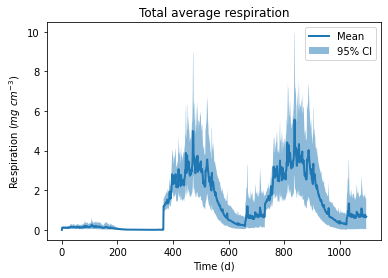

In [79]:
from pandas import Series
tt        = np.linspace(0,len(t)-1,len(t)) # Number of repetitions = 10
time      = np.linspace(0,1095,1096)
Respi_tot = {}
type(Res)
for i in tt:
  Respi_tot["Run"+str(int(i)+1)] = Res[int(i)][1094]

res_tempo  = list(Respi_tot.values())
Respi_mean = (np.array(res_tempo).mean(axis=0))
respiration_5  = np.percentile(res_tempo,5,axis=0)
respiration_95 = np.percentile(res_tempo,95,axis=0)

#fig, ax = plt.subplots()

#ax.fill_between(time,respiration_5,respiration_95, alpha=.5, linewidth=0,label="95% CI")
#ax.plot(time,Respi_mean, linewidth=2,label="Mean")

#plt.xlabel('Time (d)') 
#plt.ylabel('Respiration ($mg$ $cm^{-3}$)') 
#plt.title('Total average respiration') 
#ax.legend()
#fig.show()

In [80]:
np.savetxt('/content/output/respiration_Mean.csv',Respi_mean,delimiter=",")
np.savetxt('/content/output/respiration_5.csv',respiration_5,delimiter=",")
np.savetxt('/content/output/respiration_95.csv',respiration_95,delimiter=",")

**CUE**

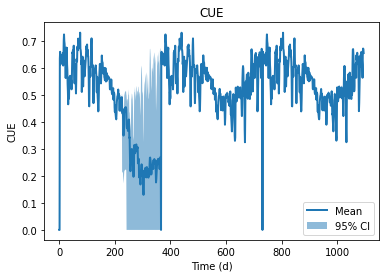

In [89]:
from pandas import Series
tt        = np.linspace(0,len(t)-1,len(t)) # Number of repetitions = 10
time      = np.linspace(0,1095,1096)
CUE_tot   = {}

for i in tt:
  CUE_tot["Run"+str(int(i)+1)] = CUEf[int(i)][1094]

CUE_tempo   = list(CUE_tot.values())
CUE_mean    = (np.array(CUE_tempo).mean(axis=0))
CUE_5       = np.percentile(CUE_tempo,5,axis=0)
CUE_95      = np.percentile(CUE_tempo,95,axis=0)

#fig, ax = plt.subplots()

#ax.fill_between(time,CUE_5,CUE_95, alpha=.5, linewidth=0,label="95% CI")
#ax.plot(time,CUE_mean, linewidth=2,label="Mean")

#plt.xlabel('Time (d)') 
#plt.ylabel('CUE') 
#plt.title('CUE') 
#ax.legend()
#fig.show()

In [81]:
np.savetxt('/content/output/CUE_mean.csv',CUE_mean,delimiter=",")
np.savetxt('/content/output/CUE_5.csv',CUE_5,delimiter=",")
np.savetxt('/content/output/CUE_95.csv',CUE_95,delimiter=",")

**TOTAL SUBSTRATE**

Substrate degradation

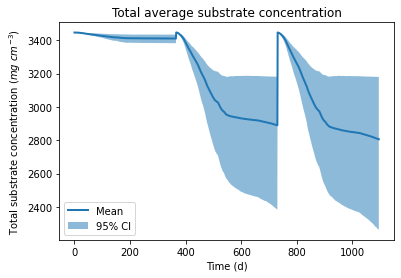

In [ ]:
Sub  = substrate   # Substrate output
type(Sub)
len(Sub)
a = (Sub[0][1094])

tt        = np.linspace(0,len(t)-1,len(t)) # Number of repetitions = 10
time      = np.linspace(0,1095,1096)
Subst_tot = {}

for i in tt:
  Subst_tot["Run"+str(int(i)+1)] = Sub[int(i)][1094]

Sub_tempo   = list(Subst_tot.values())
Sub_sum     = np.mean((np.array(Sub_tempo).sum(axis=1)),axis=0)
Sub_05      = np.percentile((np.array(Sub_tempo).sum(axis=1)),5,axis=0)
Sub_95      = np.percentile((np.array(Sub_tempo).sum(axis=1)),95,axis=0)

#fig, ax = plt.subplots()

#ax.fill_between(time,Sub_05,Sub_95, alpha=.5, linewidth=0,label="95% CI")
#ax.plot(time,Sub_sum, linewidth=2,label="Mean")

#plt.xlabel('Time (d)') 
#plt.ylabel('Total substrate concentration ($mg$ $cm^{-3}$)') 
#plt.title('Total average substrate concentration') 
#ax.legend(loc="lower left")
#fig.show()

In [82]:
np.savetxt('/content/output/mean_total_substrate.csv',Sub_sum,delimiter=",")
np.savetxt('/content/output/p05_total_substrate.csv',Sub_05,delimiter=",")
np.savetxt('/content/output/p95_total_substrate.csv',Sub_95,delimiter=",")

Substrate mass loss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


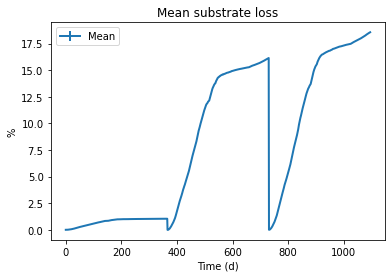

In [ ]:
Sub_std     = np.std((np.array(Sub_tempo).sum(axis=1)),axis=0)

#plt.errorbar(time,(Sub_sum[0]-Sub_sum)*100/Sub_sum[0],yerr=(Sub_std[0]-Sub_std)*100/Sub_std[0],linewidth=2,label="Mean")

#plt.xlabel('Time (d)') 
#plt.ylabel('%') 
#plt.title('Mean substrate loss') 
#plt.legend(loc="upper left")
#plt.show()


In [88]:
sub_loss = (Sub_sum[0]-Sub_sum)*100/Sub_sum[0]
yerr     = (Sub_std[0]-Sub_std)*100/Sub_std[0]
np.savetxt('/content/output/substrate_loss.csv',sub_loss,delimiter=",")
np.savetxt('/content/output/substrate_error.csv',yerr,delimiter=",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Substrate composition in proportions

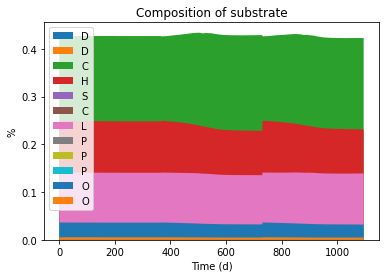

In [91]:
Sub  = substrate   # Substrate output
type(Sub)
len(Sub)
a = (Sub[0][1094])

tt        = np.linspace(0,len(t)-1,len(t)) # Number of repetitions = 10
time      = np.linspace(0,1095,1096)

Subst_prp = {}

for i in tt:
  Subst_prp["Run"+str(int(i)+1)] = (Subst_tot["Run"+str(int(i)+1)]/np.sum(Subst_tot["Run"+str(int(i)+1)])).T

DeadMic         = []
DeadEnz         = []
Cellulose       = []
Hemicellulose   = []
Starch          = []
Chitin          = []
Lignin          = []
Protein1        = []
Protein2        = []
Protein3        = []
OrgP1           = []
OrgP2           = []

for i in tt:
  DeadMic.append(Subst_prp["Run"+str(int(i)+1)]["DeadMic"])
  DeadEnz.append(Subst_prp["Run"+str(int(i)+1)]["DeadEnz"])
  Cellulose.append(Subst_prp["Run"+str(int(i)+1)]["Cellulose"])
  Hemicellulose.append(Subst_prp["Run"+str(int(i)+1)]["Hemicellulose"])
  Starch.append(Subst_prp["Run"+str(int(i)+1)]["Starch"])
  Chitin.append(Subst_prp["Run"+str(int(i)+1)]["Chitin"])
  Lignin.append(Subst_prp["Run"+str(int(i)+1)]["Lignin"])
  Protein1.append(Subst_prp["Run"+str(int(i)+1)]["Protein1"])
  Protein2.append(Subst_prp["Run"+str(int(i)+1)]["Protein2"])
  Protein3.append(Subst_prp["Run"+str(int(i)+1)]["Protein3"])
  OrgP1.append(Subst_prp["Run"+str(int(i)+1)]["OrgP1"])
  OrgP2.append(Subst_prp["Run"+str(int(i)+1)]["OrgP2"])

#plt.stackplot(time,np.mean(DeadMic,axis=0),labels="DeadMic")
#plt.stackplot(time,np.mean(DeadEnz,axis=0),labels="DeadEnz")
#plt.stackplot(time,np.mean(Cellulose,axis=0),labels="Cellulose")
#plt.stackplot(time,np.mean(Hemicellulose,axis=0),labels="Hemicellulose")
#plt.stackplot(time,np.mean(Starch,axis=0),labels="Starch")
#plt.stackplot(time,np.mean(Chitin,axis=0),labels="Chitin")
#plt.stackplot(time,np.mean(Lignin,axis=0),labels="Lignin")
#plt.stackplot(time,np.mean(Protein1,axis=0),labels="Protein1")
#plt.stackplot(time,np.mean(Protein2,axis=0),labels="Protein2")
#plt.stackplot(time,np.mean(Protein3,axis=0),labels="Protein3")
#plt.stackplot(time,np.mean(OrgP1,axis=0),labels="OrgP1")
#plt.stackplot(time,np.mean(OrgP2,axis=0),labels="OrgP2")
#plt.xlabel('Time (d)') 
#plt.ylabel('%') 
#plt.title('Composition of substrate') 
#plt.legend(loc="upper left")
#plt.show()


In [95]:
np.savetxt('/content/output/DeadMic_proportion.csv',DeadMic,delimiter=",")
np.savetxt('/content/output/DeadEnz_proportion.csv',DeadEnz,delimiter=",")
np.savetxt('/content/output/Cellulose_proportion.csv',Cellulose,delimiter=",")
np.savetxt('/content/output/Hemicellulose_proportion.csv',Hemicellulose,delimiter=",")
np.savetxt('/content/output/Starch_proportion.csv',Starch,delimiter=",")
np.savetxt('/content/output/Chitin_proportion.csv',Chitin,delimiter=",")
np.savetxt('/content/output/Lignin_proportion.csv',Lignin,delimiter=",")
np.savetxt('/content/output/Protein1_proportion.csv',Protein1,delimiter=",")
np.savetxt('/content/output/Protein2_proportion.csv',Protein2,delimiter=",")
np.savetxt('/content/output/Protein3_proportion.csv',Protein3,delimiter=",")
np.savetxt('/content/output/OrgP1_proportion.csv',OrgP1,delimiter=",")
np.savetxt('/content/output/OrgP2_proportion.csv',OrgP2,delimiter=",")

Substrate composition in absolute values

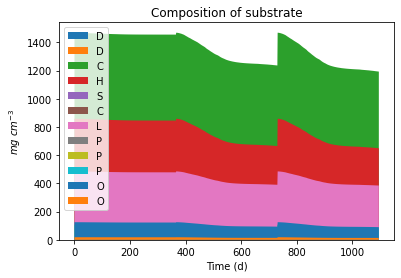

In [102]:
Sub  = substrate   # Substrate output
type(Sub)
len(Sub)
a = (Sub[0][1094])

tt        = np.linspace(0,len(t)-1,len(t)) # Number of repetitions = 10
time      = np.linspace(0,1095,1096)

Subst_prp = {}

for i in tt:
  Subst_prp["Run"+str(int(i)+1)] = (Subst_tot["Run"+str(int(i)+1)]).T

DeadMic         = []
DeadEnz         = []
Cellulose       = []
Hemicellulose   = []
Starch          = []
Chitin          = []
Lignin          = []
Protein1        = []
Protein2        = []
Protein3        = []
OrgP1           = []
OrgP2           = []

for i in tt:
  DeadMic.append(Subst_prp["Run"+str(int(i)+1)]["DeadMic"])
  DeadEnz.append(Subst_prp["Run"+str(int(i)+1)]["DeadEnz"])
  Cellulose.append(Subst_prp["Run"+str(int(i)+1)]["Cellulose"])
  Hemicellulose.append(Subst_prp["Run"+str(int(i)+1)]["Hemicellulose"])
  Starch.append(Subst_prp["Run"+str(int(i)+1)]["Starch"])
  Chitin.append(Subst_prp["Run"+str(int(i)+1)]["Chitin"])
  Lignin.append(Subst_prp["Run"+str(int(i)+1)]["Lignin"])
  Protein1.append(Subst_prp["Run"+str(int(i)+1)]["Protein1"])
  Protein2.append(Subst_prp["Run"+str(int(i)+1)]["Protein2"])
  Protein3.append(Subst_prp["Run"+str(int(i)+1)]["Protein3"])
  OrgP1.append(Subst_prp["Run"+str(int(i)+1)]["OrgP1"])
  OrgP2.append(Subst_prp["Run"+str(int(i)+1)]["OrgP2"])

#plt.stackplot(time,np.mean(DeadMic,axis=0),labels="DeadMic")
#plt.stackplot(time,np.mean(DeadEnz,axis=0),labels="DeadEnz")
#plt.stackplot(time,np.mean(Cellulose,axis=0),labels="Cellulose")
#plt.stackplot(time,np.mean(Hemicellulose,axis=0),labels="Hemicellulose")
#plt.stackplot(time,np.mean(Starch,axis=0),labels="Starch")
#plt.stackplot(time,np.mean(Chitin,axis=0),labels="Chitin")
#plt.stackplot(time,np.mean(Lignin,axis=0),labels="Lignin")
#plt.stackplot(time,np.mean(Protein1,axis=0),labels="Protein1")
#plt.stackplot(time,np.mean(Protein2,axis=0),labels="Protein2")
#plt.stackplot(time,np.mean(Protein3,axis=0),labels="Protein3")
#plt.stackplot(time,np.mean(OrgP1,axis=0),labels="OrgP1")
#plt.stackplot(time,np.mean(OrgP2,axis=0),labels="OrgP2")
#plt.xlabel('Time (d)') 
#plt.ylabel('$mg$ $cm^{-3}$') 
#plt.title('Composition of substrate') 
#plt.legend(loc="upper left")
#plt.show()

In [98]:
np.savetxt('/content/output/DeadMic_absolute.csv',DeadMic,delimiter=",")
np.savetxt('/content/output/DeadEnz_absolute.csv',DeadEnz,delimiter=",")
np.savetxt('/content/output/Cellulose_absolute.csv',Cellulose,delimiter=",")
np.savetxt('/content/output/Hemicellulose_absolute.csv',Hemicellulose,delimiter=",")
np.savetxt('/content/output/Starch_absolute.csv',Starch,delimiter=",")
np.savetxt('/content/output/Chitin_absolute.csv',Chitin,delimiter=",")
np.savetxt('/content/output/Lignin_absolute.csv',Lignin,delimiter=",")
np.savetxt('/content/output/Protein1_absolute.csv',Protein1,delimiter=",")
np.savetxt('/content/output/Protein2_absolute.csv',Protein2,delimiter=",")
np.savetxt('/content/output/Protein3_absolute.csv',Protein3,delimiter=",")
np.savetxt('/content/output/OrgP1_absolute.csv',OrgP1,delimiter=",")
np.savetxt('/content/output/OrgP2_absolute.csv',OrgP2,delimiter=",")

**MICROBIAL BIOMASS** 

Total Biomass

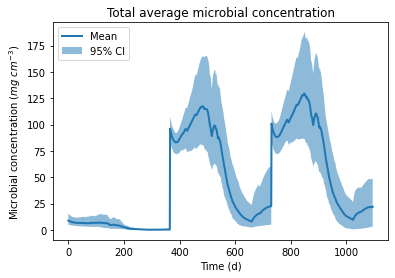

In [103]:
Biom = microbes    # Taxon-specific total biomass summed over the grid Biom[int(0)]
type(Biom)
len(Biom)

tt        = np.linspace(0,len(t)-1,len(t)) # Number of repetitions = 10
time      = np.linspace(0,1095,1096)
Bioma_tot = {}

for i in tt:
  Bioma_tot["Run"+str(int(i)+1)] = Biom[int(i)][1094]

Bio_tempo   = list(Bioma_tot.values())
Bio_sum     = np.mean((np.array(Bio_tempo).sum(axis=1)),axis=0)
Bio_05      = np.percentile((np.array(Bio_tempo).sum(axis=1)),5,axis=0)
Bio_95      = np.percentile((np.array(Bio_tempo).sum(axis=1)),95,axis=0)

#fig, ax = plt.subplots()

#ax.fill_between(time,Bio_05,Bio_95, alpha=.5, linewidth=0,label="95% CI")
#ax.plot(time,Bio_sum, linewidth=2,label="Mean")

#plt.xlabel('Time (d)') 
#plt.ylabel('Microbial concentration ($mg$ $cm^{-3}$)') 
#plt.title('Total average microbial concentration') 
#ax.legend(loc="upper left")
#fig.show()

In [100]:
np.savetxt('/content/output/Total_mean_biomass.csv',Bio_sum,delimiter=",")
np.savetxt('/content/output/Per05_mean_biomass.csv',Bio_05,delimiter=",")
np.savetxt('/content/output/Per95_mean_biomass.csv',Bio_95,delimiter=",")

Total Biomass per Run

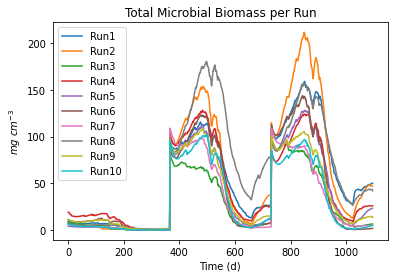

In [104]:
tt         = np.linspace(0,len(t)-1,len(t)) # Number of repetitions = 10
time       = np.linspace(0,1095,1096)
Bioma_taxa = {} # Total biomass

for i in tt:
  Bioma_taxa["Run"+str(int(i)+1)] = np.sum(Bioma_tot["Run"+str(int(i)+1)])
#  plt.plot(time,Bioma_taxa["Run"+str(int(i)+1)],label="Run"+str(int(i)+1))
#plt.xlabel('Time (d)') 
#plt.ylabel('$mg$ $cm^{-3}$') 
#plt.title('Total Microbial Biomass per Run') 
#plt.legend(loc="upper left")
#plt.show()


In [111]:
tt         = np.linspace(0,len(t)-1,len(t)) # Number of repetitions = 10
time       = np.linspace(0,1095,1096)
Bioma_taxa_array = [] # Total biomass

for i in tt:
  Bioma_taxa_array.append(Bioma_taxa["Run"+str(int(i)+1)])

In [112]:
np.savetxt('/content/output/Total_biomass_run.csv',Bioma_taxa_array,delimiter=",")

*Proportion of the different taxa at the end of the simulations. This will help me to get the proportions of the parameters for later analysis*

In [120]:
Bioma_tot["Run1"][1095]/Bioma_taxa["Run1"][1095]

Tax1     0.000000
Tax2     0.000000
Tax3     0.875876
Tax4     0.124124
Tax5     0.000000
Tax6     0.000000
Tax7     0.000000
Tax8     0.000000
Tax9     0.000000
Tax10    0.000000
Name: 1095, dtype: float32

*Proportions of different taxa per un to save*

In [121]:
tt         = np.linspace(0,len(t)-1,len(t)) # Number of repetitions = 10
time       = np.linspace(0,1095,1096)
Bioma_taxa_prop_array = [] # Total biomass

for i in tt:
  Bioma_taxa_prop_array.append(Bioma_tot["Run"+str(int(i)+1)][1095]/Bioma_taxa["Run"+str(int(i)+1)][1095])


In [123]:
np.savetxt('/content/output/prop_taxa_run.csv',Bioma_taxa_prop_array,delimiter=",")

Proportion of biomass degrading specific substrates

*Here, I get the total biomass containing specific enzymes per run. The final file is a dicctionary "Sub_Taxa_R", which has run number and enzyme number*

In [133]:
taxa_n        = 10 # Number of taxa (10 taxa, but it can be change to 100)
enzyme_n      = 50 # Number of enzymes
subs_n        = 12 # Number of substrates
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m1            = np.linspace(0,(enzyme_n)-1,(enzyme_n))      # Number of enzymes
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
m4            = np.linspace(0,(subs_n)-1,(subs_n))      # Number of substrates
Sub_Taxa_R    = {} # Contains biomass degrading specific enzymes for multiple runs

for iii in m:
  enz_taxa      = {} # Contains biomass having specific enzymes for 1 run
  enz_taxa_sum  = {} # Contains biomass having specific enzymes for 1 run
  for ii in m1:
    temp        = []
    for i in m2:
      if EnzGenes[int(iii)][1094][0:len(m2)]["Enz"+str(int(ii)+1)][int(i)]==1:
        temp.append(Bioma_tot["Run"+str(int(iii)+1)].T["Tax"+str(int(i)+1)].tolist())
        enz_taxa["Enz"+str(int(ii)+1)] = temp
      else:
        temp.append(np.zeros(len(time)).tolist())
        enz_taxa["Enz"+str(int(ii)+1)] = temp
    enz_taxa_sum["Enz"+str(int(ii)+1)] = np.sum(enz_taxa["Enz"+str(int(ii)+1)],axis=0)
  Sub_Taxa_R["Run"+str(int(iii)+1)] = enz_taxa_sum


In [135]:
import pickle
output = open('/content/output/Biomass_Enzyme.pkl', 'wb')
pickle.dump(Sub_Taxa_R, output)
output.close()

In [139]:
#import pprint, pickle
#pkl_file = open('/content/output/Biomass_Enzyme.pkl', 'rb')
#Sub_Taxa_R = pickle.load(pkl_file)
#pprint.pprint(Sub_Taxa_R)
#pkl_file.close()

*Here, I have test plots of how the proportions*

<function matplotlib.pyplot.show>

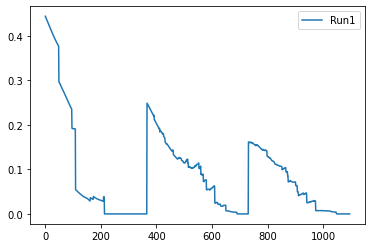

In [ ]:
#plt.plot(time,(Sub_Taxa_R["Run1"]["Enz2"]/np.sum(Bioma_tot["Run1"])),label="Run1") # [400:len(time)]
#plt.legend()
#plt.show

*Here, I have determine the proportions of biomass degrading specific substrates. Because we have some redundancy in taxa that can degrade the same substrate, I calculate the proportions based on the total biomass degrading all the substrates together to account for the redundancies. This information is collected in the output bio_run*

In [140]:
m3          = np.linspace(0,(subs_n)-1,(subs_n))      # Number of substrates
m           = np.linspace(0,len(t)-1,len(t))  # Number of simulations
Sub_Taxa_TR = {}

for iii in m:
  Sub_Taxa_T     = {} # Contains biomass degrading specific enzymes for multiple runs
  Sub_Taxa_sum   = {} # Contains total biomass degrading specific enzymes for multiple runs
  for j in m3:
    temp1=[]
    for ii in m1:
      if ReqEnz_dfA[int(iii)][1094][0:12].T["set1"]["Sub"+str(int(j)+1)][(int(ii))] == 1:
        temp1.append(Sub_Taxa_R["Run"+str(int(iii)+1)]["Enz"+str(int(ii)+1)].tolist())
        Sub_Taxa_T["Sub"+str(int(j)+1)] = temp1
      else:
        temp1.append(np.zeros(len(time)).tolist())
        Sub_Taxa_T["Sub"+str(int(j)+1)] = temp1
    Sub_Taxa_sum["Sub"+str(int(j)+1)] = np.sum(Sub_Taxa_T["Sub"+str(int(j)+1)],axis=0)
  Sub_Taxa_TR["Run"+str(int(iii)+1)] = Sub_Taxa_sum

In [141]:
import pickle
output = open('/content/output/Biomass_substrate.pkl', 'wb')
pickle.dump(Sub_Taxa_TR, output)
output.close()

In [ ]:
bio_run = {} # Total Biomass including redundancies

for iii in m:
  tem = []
  for j in m3:
    tem.append(Sub_Taxa_TR["Run"+str(int(iii)+1)]["Sub"+str(int(j)+1)].tolist())
  bio_run["Run"+str(int(iii)+1)] = np.sum(tem,axis=0)  

In [142]:
import pickle
output = open('/content/output/Biomass_redundancies.pkl', 'wb')
pickle.dump(bio_run, output)
output.close()

*Test plot*

In [143]:
m           = np.linspace(0,len(t)-1,len(t))  # Number of simulations

DeadMic         = []
DeadEnz         = []
Cellulose       = []
Hemicellulose   = []
Starch          = []
Chitin          = []
Lignin          = []
Protein1        = []
Protein2        = []
Protein3        = []
OrgP1           = []
OrgP2           = []

for i in m:
  DeadMic.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(0)+1)]/bio_run["Run"+str(int(i)+1)])
  DeadEnz.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(1)+1)]/bio_run["Run"+str(int(i)+1)])
  Cellulose.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(2)+1)]/bio_run["Run"+str(int(i)+1)])
  Hemicellulose.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(3)+1)]/bio_run["Run"+str(int(i)+1)])
  Starch.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(4)+1)]/bio_run["Run"+str(int(i)+1)])
  Chitin.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(5)+1)]/bio_run["Run"+str(int(i)+1)])
  Lignin.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(6)+1)]/bio_run["Run"+str(int(i)+1)])
  Protein1.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(7)+1)]/bio_run["Run"+str(int(i)+1)])
  Protein2.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(8)+1)]/bio_run["Run"+str(int(i)+1)])
  Protein3.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(9)+1)]/bio_run["Run"+str(int(i)+1)])
  OrgP1.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(10)+1)]/bio_run["Run"+str(int(i)+1)])
  OrgP2.append(Sub_Taxa_TR["Run"+str(int(i)+1)]["Sub"+str(int(11)+1)]/bio_run["Run"+str(int(i)+1)])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7

<function matplotlib.pyplot.show>

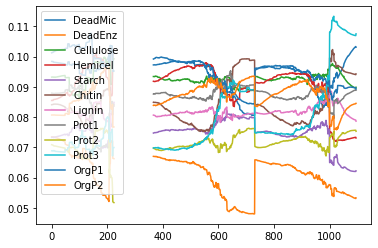

In [145]:
#plt.plot(time,np.nan_to_num(np.mean(DeadMic,axis=0)))
#plt.plot(time,np.mean(DeadMic,axis=0),label="DeadMic")
#plt.plot(time,np.mean(DeadEnz,axis=0),label="DeadEnz")
#plt.plot(time,np.mean(Cellulose,axis=0),label="Cellulose")
#plt.plot(time,np.mean(Hemicellulose,axis=0),label="Hemicel")
#plt.plot(time,np.mean(Starch,axis=0),label="Starch")
#plt.plot(time,np.mean(Chitin,axis=0),label="Chitin")
#plt.plot(time,np.mean(Lignin,axis=0),label="Lignin")
#plt.plot(time,np.mean(Protein1,axis=0),label="Prot1")
#plt.plot(time,np.mean(Protein2,axis=0),label="Prot2")
#plt.plot(time,np.mean(Protein3,axis=0),label="Prot3")
#plt.plot(time,np.mean(OrgP1,axis=0),label="OrgP1")
#plt.plot(time,np.mean(OrgP2,axis=0),label="OrgP2")
#plt.legend()
#plt.show

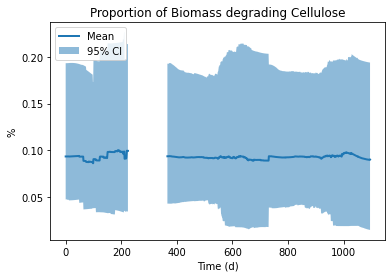

In [146]:
#fig, ax = plt.subplots()

#ax.fill_between(time,np.percentile(Cellulose,5,axis=0),np.percentile(Cellulose,95,axis=0), alpha=.5, linewidth=0,label="95% CI")
#ax.plot(time,np.mean(Cellulose,axis=0), linewidth=2,label="Mean")

#plt.xlabel('Time (d)') 
#plt.ylabel('%') 
#plt.title('Proportion of Biomass degrading Cellulose') 
#ax.legend(loc="upper left")
#fig.show()

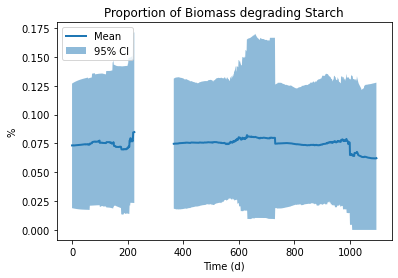

In [147]:
#fig, ax = plt.subplots()

#ax.fill_between(time,np.percentile(Starch,5,axis=0),np.percentile(Starch,95,axis=0), alpha=.5, linewidth=0,label="95% CI")
#ax.plot(time,np.mean(Starch,axis=0), linewidth=2,label="Mean")

#plt.xlabel('Time (d)') 
#plt.ylabel('%') 
#plt.title('Proportion of Biomass degrading Starch') 
#ax.legend(loc="upper left")
#fig.show()

#**MODEL PARAMETERS**

*Cost of constituitive enzyme production = EnzProdConsti_trait*

In [150]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
Enzcon  = {}
EnzconD = {}

for j in m:
  temp   = []
  for i in m2:
    temp.append(EnzProdConsti_trait[int(j)][1094][0:taxa_n][int(i)]*(Bioma_tot["Run"+str(int(j)+1)][1095]/Bioma_taxa["Run"+str(int(j)+1)][1095])[int(i)])
  Enzcon["Run"+str(int(j)+1)] = np.sum(temp)
  EnzconD["Run"+str(int(j)+1)] = temp

(array([3., 1., 0., 0., 1., 1., 0., 2., 1., 1.]),
 array([3.6281246e-05, 4.2298961e-05, 4.8316680e-05, 5.4334396e-05,
        6.0352111e-05, 6.6369830e-05, 7.2387542e-05, 7.8405261e-05,
        8.4422980e-05, 9.0440692e-05, 9.6458411e-05], dtype=float32),
 <a list of 10 Patch objects>)

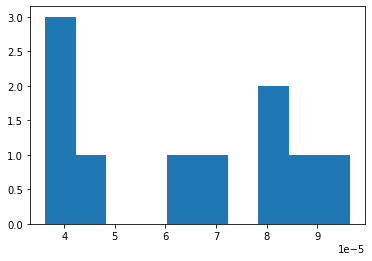

In [149]:
#plt.hist(Enzcon.values())

In [155]:
import pickle
output = open('/content/output/EnzProdConsti_trait.pkl', 'wb')
pickle.dump(Enzcon, output)
output.close()

*Cost of inducible enzyme production = EnzProdInduci_trait*

In [164]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
Enzind = {}

for j in m:
  temp   = []
  for i in m2:
    temp.append(EnzProdInduci_trait[int(j)][1094][0:taxa_n][int(i)]*(Bioma_tot["Run"+str(int(j)+1)][1095]/Bioma_taxa["Run"+str(int(j)+1)][1095])[int(i)])
  Enzind["Run"+str(int(j)+1)] = np.sum(temp)

(array([2., 0., 1., 1., 1., 4., 0., 0., 0., 1.]),
 array([1.4829124e-05, 2.1247859e-05, 2.7666592e-05, 3.4085329e-05,
        4.0504063e-05, 4.6922796e-05, 5.3341533e-05, 5.9760267e-05,
        6.6179004e-05, 7.2597737e-05, 7.9016470e-05], dtype=float32),
 <a list of 10 Patch objects>)

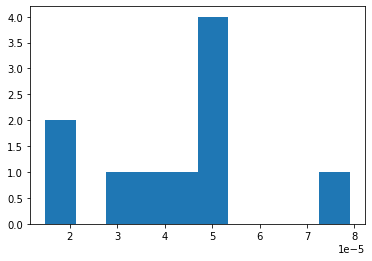

In [ ]:
#plt.hist(Enzind.values())

In [156]:
import pickle
output = open('/content/output/EnzProdInd_trait.pkl', 'wb')
pickle.dump(Enzind, output)
output.close()

*Cost of constituitive osmolyte production = OsmoProdConsti_trait*

In [165]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
oscons = {}

for j in m:
  temp   = []
  for i in m2:
    temp.append(OsmoProdConsti_trait[int(j)][1094][0:taxa_n][int(i)]*(Bioma_tot["Run"+str(int(j)+1)][1095]/Bioma_taxa["Run"+str(int(j)+1)][1095])[int(i)])
  oscons["Run"+str(int(j)+1)] = np.sum(temp)

(array([3., 0., 1., 0., 3., 0., 1., 0., 0., 2.]),
 array([3.5439771e-05, 3.8801507e-05, 4.2163239e-05, 4.5524976e-05,
        4.8886708e-05, 5.2248444e-05, 5.5610180e-05, 5.8971913e-05,
        6.2333645e-05, 6.5695385e-05, 6.9057118e-05], dtype=float32),
 <a list of 10 Patch objects>)

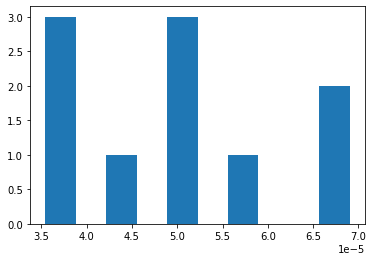

In [ ]:
#plt.hist(oscons.values())

In [157]:
import pickle
output = open('/content/output/OsmoProdConsti_trait.pkl', 'wb')
pickle.dump(oscons, output)
output.close()

*Cost of inducible osmolyte production = OsmoProdInduci_trait*

In [ ]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
osindu = {}

for j in m:
  temp   = []
  for i in m2:
    temp.append(OsmoProdInduci_trait[int(j)][1094][0:taxa_n][int(i)]*(Bioma_tot["Run"+str(int(j)+1)][1095]/Bioma_taxa["Run"+str(int(j)+1)][1095])[int(i)])
  osindu["Run"+str(int(j)+1)] = np.sum(temp)

(array([3., 0., 0., 0., 1., 0., 2., 1., 0., 3.]),
 array([0.00052766, 0.00057205, 0.00061644, 0.00066083, 0.00070522,
        0.00074962, 0.00079401, 0.0008384 , 0.00088279, 0.00092718,
        0.00097157], dtype=float32),
 <a list of 10 Patch objects>)

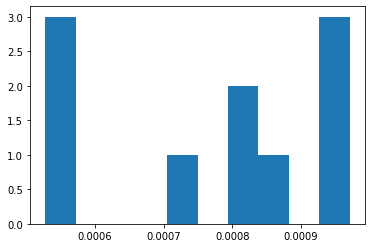

In [ ]:
#plt.hist(osindu.values())

In [158]:
import pickle
output = open('/content/output/OsmoProdInd_trait.pkl', 'wb')
pickle.dump(osindu, output)
output.close()

*Drought Tolerance per taxa = TaxDroughtTol*

In [166]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
taxdrot = {}

for j in m:
  temp   = []
  for i in m2:
    temp.append(TaxDroughtTol[int(j)][1094][0:taxa_n][int(i)]*(Bioma_tot["Run"+str(int(j)+1)][1095]/Bioma_taxa["Run"+str(int(j)+1)][1095])[int(i)])
  taxdrot["Run"+str(int(j)+1)] = np.sum(temp)

(array([3., 0., 0., 0., 1., 0., 0., 0., 3., 3.]),
 array([0.43402022, 0.48882037, 0.5436205 , 0.59842074, 0.6532209 ,
        0.70802104, 0.7628212 , 0.81762135, 0.87242156, 0.9272217 ,
        0.98202187], dtype=float32),
 <a list of 10 Patch objects>)

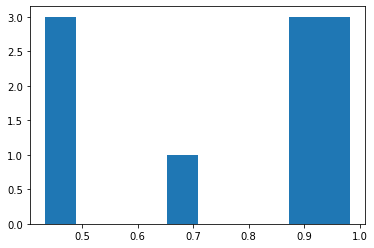

In [ ]:
#plt.hist(taxdrot.values())

In [159]:
import pickle
output = open('/content/output/TaxDroughtTol.pkl', 'wb')
pickle.dump(taxdrot, output)
output.close()

*Cost for transporter production = UptakeGenes_trait*

In [ ]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100) 
taxtran = {}

for j in m:
  temp   = []
  for i in m2:
    temp.append(UptakeGenes_trait[int(j)][1094][0:taxa_n][int(i)]*(Bioma_tot["Run"+str(int(j)+1)][1095]/Bioma_taxa["Run"+str(int(j)+1)][1095])[int(i)])
  taxtran["Run"+str(int(j)+1)] = np.sum(temp)

(array([1., 0., 0., 0., 0., 0., 0., 3., 2., 4.]),
 array([0.0310154 , 0.03586365, 0.0407119 , 0.04556015, 0.0504084 ,
        0.05525665, 0.0601049 , 0.06495315, 0.0698014 , 0.07464965,
        0.0794979 ], dtype=float32),
 <a list of 10 Patch objects>)

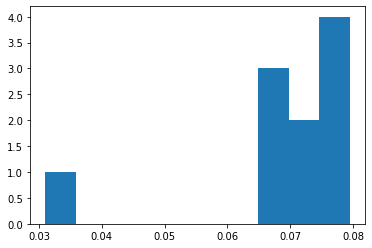

In [ ]:
#plt.hist(taxtran.values())

In [160]:
import pickle
output = open('/content/output/UptakeGenes_trait.pkl', 'wb')
pickle.dump(taxtran, output)
output.close()

*Enzyme-related parameters*

Vmax

In [167]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m1            = np.linspace(0,(enzyme_n)-1,(enzyme_n))      # Number of enzymes
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100)
m4            = np.linspace(0,(subs_n)-1,(subs_n))      # Number of substrates
enz_Taxa_PR   = {} # Contains biomass degrading specific enzymes for multiple runs

for iii in m:
  enz_taxa      = {} # Contains proportion having specific taxa per enzyme for 1 run ***.tolist()
  for ii in m1:
    temp        = []
    for i in m2:
      if EnzGenes[int(iii)][1094][0:len(m2)]["Enz"+str(int(ii)+1)][int(i)]==1:
        temp.append((Bioma_tot["Run"+str(int(iii)+1)][1095]/Bioma_taxa["Run"+str(int(iii)+1)][1095])[int(i)])
        enz_taxa["Enz"+str(int(ii)+1)] = temp
      else:
        temp.append(0)
        enz_taxa["Enz"+str(int(ii)+1)] = temp
  enz_Taxa_PR["Run"+str(int(iii)+1)] = enz_taxa

In [ ]:
# enz_Taxa_PR["Run1"]

In [168]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m1            = np.linspace(0,(enzyme_n)-1,(enzyme_n))      # Number of enzymes
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100)
m4            = ["DeadMic","DeadEnz","Cellulose","Hemicellulose",
                 "Starch","Chitin","Lignin","Protein1","Protein2",
                 "Protein3","OrgP1","OrgP2"]      # Number of substrates

vmax0_total_R = {}

for iii in m:
  temp_sub = {}
  for j in m4:
    vmax0_Dead_E  = {}
    for ii in m1:
      temp = {}
      temp_sum = []
      for i in m2:
        temp["Taxa"+str(int(i)+1)] = (Vmax0[int(iii)][1094][0:enzyme_n][j]["Enz"+str(int(ii)+1)]*enz_Taxa_PR["Run"+str(int(iii)+1)]["Enz"+str(int(ii)+1)][(int(i))])
        temp_sum.append((Vmax0[int(iii)][1094][0:enzyme_n][j]["Enz"+str(int(ii)+1)]*enz_Taxa_PR["Run"+str(int(iii)+1)]["Enz"+str(int(ii)+1)][(int(i))]))
      vmax0_Dead_E["Enz"+str(int(ii)+1)] = np.sum(temp_sum)/np.sum(enz_Taxa_PR["Run"+str(int(iii)+1)]["Enz"+str(int(ii)+1)])
    temp_sub[j] = vmax0_Dead_E
  vmax0_total_R["Run"+str(int(iii)+1)] = temp_sub


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


*Plotting histogram*

In [169]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m1            = np.linspace(0,(enzyme_n)-1,(enzyme_n))      # Number of enzymes
m4            = ["DeadMic","DeadEnz","Cellulose","Hemicellulose",
                 "Starch","Chitin","Lignin","Protein1","Protein2",
                 "Protein3","OrgP1","OrgP2"]      # Number of substrates

vmax0_plot = []

for iii in m:
  for j in m4:
    for ii in m1:
      vmax0_plot.append(vmax0_total_R["Run"+str(int(iii)+1)][j]["Enz"+str(int(ii)+1)])

vmax0_plot_nonan = [x for x in vmax0_plot if ~np.isnan(x)]

(array([280., 409., 437., 416., 411., 388., 386., 407., 421., 405.]),
 array([ 3.39086401,  8.04948816, 12.70811231, 17.36673646, 22.02536061,
        26.68398476, 31.34260891, 36.00123307, 40.65985722, 45.31848137,
        49.97710552]),
 <a list of 10 Patch objects>)

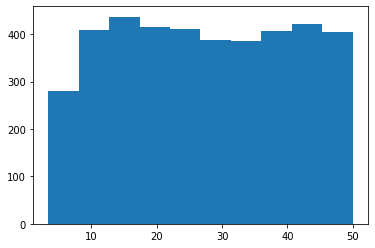

In [170]:
#plt.hist(vmax0_plot_nonan)

In [ ]:
import pickle
output = open('/content/output/Vmax.pkl', 'wb')
pickle.dump(vmax0_total_R, output)
output.close()

Km0

In [171]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m1            = np.linspace(0,(enzyme_n)-1,(enzyme_n))      # Number of enzymes
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100)
m4            = ["DeadMic","DeadEnz","Cellulose","Hemicellulose",
                 "Starch","Chitin","Lignin","Protein1","Protein2",
                 "Protein3","OrgP1","OrgP2"]      # Number of substrates

Km0_total_R  = {}

for iii in m:
  temp_sub = {}
  for j in m4:
    Km0_Dead_E  = {}
    for ii in m1:
      temp = {}
      temp_sum = []
      for i in m2:
        temp["Taxa"+str(int(i)+1)] = (Km0[int(iii)][1094][0:subs_n].T[j]["Enz"+str(int(ii)+1)]*enz_Taxa_PR["Run"+str(int(iii)+1)]["Enz"+str(int(ii)+1)][(int(i))])
        temp_sum.append((Km0[int(iii)][1094][0:subs_n].T[j]["Enz"+str(int(ii)+1)]*enz_Taxa_PR["Run"+str(int(iii)+1)]["Enz"+str(int(ii)+1)][(int(i))]))
      Km0_Dead_E["Enz"+str(int(ii)+1)] = np.sum(temp_sum)/np.sum(enz_Taxa_PR["Run"+str(int(iii)+1)]["Enz"+str(int(ii)+1)])
    temp_sub[j] = Km0_Dead_E
  Km0_total_R["Run"+str(int(iii)+1)] = temp_sub


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
# Km0_total_R["Run1"]

*Plotting histogram*

In [172]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m1            = np.linspace(0,(enzyme_n)-1,(enzyme_n))      # Number of enzymes
m4            = ["DeadMic","DeadEnz","Cellulose","Hemicellulose",
                 "Starch","Chitin","Lignin","Protein1","Protein2",
                 "Protein3","OrgP1","OrgP2"]      # Number of substrates

Km0_total_R_plot = []

for iii in m:
  for j in m4:
    for ii in m1:
      Km0_total_R_plot.append(Km0_total_R["Run"+str(int(iii)+1)][j]["Enz"+str(int(ii)+1)])

Km0_total_R_nonan = [x for x in Km0_total_R_plot if ~np.isnan(x)]

3.3908640136407735

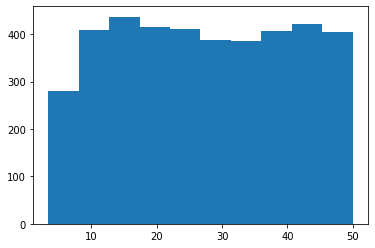

In [173]:
#plt.hist(Km0_total_R_nonan)
#np.min(Km0_total_R_nonan)

In [174]:
import pickle
output = open('/content/output/Km0.pkl', 'wb')
pickle.dump(Km0_total_R, output)
output.close()

*Uptake related parameters*

Uptake_Vmax0

In [175]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m1            = ["Mon13","Mon14","Mon1","Mon2","Mon3","Mon4",
                 "Mon5","Mon6","Mon7","Mon8","Mon9",
                 "Mon10","Mon11","Mon12"]      # Number of monomers
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100)

upt_Taxa_PR   = {} # Contains biomass degrading specific enzymes for multiple runs

for iii in m:
  enz_taxa      = {} # Contains proportion having specific taxa per enzyme for 1 run ***.tolist()
  for ii in m1:
    temp        = []
    for i in m2:
      if UptakeGenes[int(iii)][1094][0:len(m2)].rename(columns={'NH4':'Mon13','PO4':'Mon14','DeadMic':'Mon1','DeadEnz':'Mon2'})[ii][int(i)]==1:
        temp.append((Bioma_tot["Run"+str(int(iii)+1)][1095]/Bioma_taxa["Run"+str(int(iii)+1)][1095])[int(i)])
        enz_taxa[ii] = temp
      else:
        temp.append(0)
        enz_taxa[ii] = temp
  upt_Taxa_PR["Run"+str(int(iii)+1)] = enz_taxa

In [ ]:
# upt_Taxa_PR["Run1"]

In [176]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m1            = ["Mon13","Mon14","Mon1","Mon2","Mon3","Mon4",
                 "Mon5","Mon6","Mon7","Mon8","Mon9",
                 "Mon10","Mon11","Mon12"]      # Number of monomers
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100)
m4            = ["Upt1","Upt2","Upt3","Upt4",
                 "Upt5","Upt6","Upt7","Upt8","Upt9",
                 "Upt10","Upt11","Upt12","Upt13","Upt14"]      # Number of transporters

mon_n        = 14 # Number of substrates

Vmax0_uptake_R = {}

for iii in m:
  temp_sub = {}
  for j in m4:
    vmax0_Dead_E  = {}
    for ii in m1:
      temp = {}
      temp_sum = []
      for i in m2:
        temp["Taxa"+str(int(i)+1)] = (Uptake_Vmax0[int(iii)][1094][0:mon_n][j][ii]*upt_Taxa_PR["Run"+str(int(iii)+1)][ii][(int(i))])
        temp_sum.append((Uptake_Vmax0[int(iii)][1094][0:mon_n][j][ii]*upt_Taxa_PR["Run"+str(int(iii)+1)][ii][(int(i))]))
      vmax0_Dead_E[ii] = np.sum(temp_sum)/np.sum(upt_Taxa_PR["Run"+str(int(iii)+1)][ii])
    temp_sub[j] = vmax0_Dead_E
  Vmax0_uptake_R["Run"+str(int(iii)+1)] = temp_sub


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


*Plotting histogram*

In [177]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m1            = ["Mon13","Mon14","Mon1","Mon2","Mon3","Mon4",
                 "Mon5","Mon6","Mon7","Mon8","Mon9",
                 "Mon10","Mon11","Mon12"]      # Number of monomers
m4            = ["Upt1","Upt2","Upt3","Upt4",
                 "Upt5","Upt6","Upt7","Upt8","Upt9",
                 "Upt10","Upt11","Upt12","Upt13","Upt14"]      # Number of transporters

vmax0_uptake_R_plot = []

for iii in m:
  for j in m4:
    for ii in m1:
      vmax0_uptake_R_plot.append(Vmax0_uptake_R["Run"+str(int(iii)+1)][j][ii])

vmax0_uptake_R_nonan = [x for x in vmax0_uptake_R_plot if ~np.isnan(x)]

0.34494221210479736

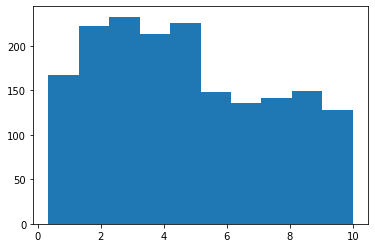

In [178]:
#plt.hist(vmax0_uptake_R_nonan)
#np.min(vmax0_uptake_R_nonan)

In [179]:
import pickle
output = open('/content/output/Uptake_Vmax0.pkl', 'wb')
pickle.dump(Vmax0_uptake_R, output)
output.close()

Uptake_Km0

In [180]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m1            = ["Mon13","Mon14","Mon1","Mon2","Mon3","Mon4",
                 "Mon5","Mon6","Mon7","Mon8","Mon9",
                 "Mon10","Mon11","Mon12"]      # Number of monomers
m2            = np.linspace(0,(taxa_n)-1,(taxa_n))       # Number of taxa (10 taxa, but it can be change to 100)
m4            = ["Upt1","Upt2","Upt3","Upt4",
                 "Upt5","Upt6","Upt7","Upt8","Upt9",
                 "Upt10","Upt11","Upt12","Upt13","Upt14"]      # Number of transporters

Km0_uptake_R = {}

for iii in m:
  temp_sub = {}
  for j in m4:
    vmax0_Dead_E  = {}
    for ii in m1:
      temp = {}
      temp_sum = []
      for i in m2:
        temp["Taxa"+str(int(i)+1)] = (Uptake_Km0[int(iii)][1094][0:len(m4)][j][ii]*upt_Taxa_PR["Run"+str(int(iii)+1)][ii][(int(i))])
        temp_sum.append((Uptake_Km0[int(iii)][1094][0:len(m4)][j][ii]*upt_Taxa_PR["Run"+str(int(iii)+1)][ii][(int(i))]))
      vmax0_Dead_E[ii] = np.sum(temp_sum)/np.sum(upt_Taxa_PR["Run"+str(int(iii)+1)][ii])
    temp_sub[j] = vmax0_Dead_E
  Km0_uptake_R["Run"+str(int(iii)+1)] = temp_sub

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


*Plotting histogram*

In [181]:
m             = np.linspace(0,len(t)-1,len(t))  # Number of simulations
m1            = ["Mon13","Mon14","Mon1","Mon2","Mon3","Mon4",
                 "Mon5","Mon6","Mon7","Mon8","Mon9",
                 "Mon10","Mon11","Mon12"]      # Number of monomers
m4            = ["Upt1","Upt2","Upt3","Upt4",
                 "Upt5","Upt6","Upt7","Upt8","Upt9",
                 "Upt10","Upt11","Upt12","Upt13","Upt14"]      # Number of transporters

Km0_uptake_R_plot = []

for iii in m:
  for j in m4:
    for ii in m1:
      Km0_uptake_R_plot.append(Km0_uptake_R["Run"+str(int(iii)+1)][j][ii])

Km0_uptake_R_nonan = [x for x in Km0_uptake_R_plot if ~np.isnan(x)]

0.06898844242095947

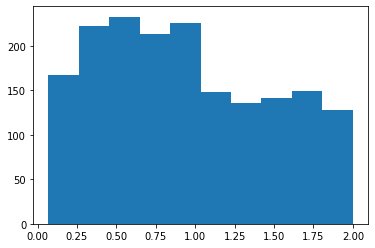

In [182]:
#plt.hist(Km0_uptake_R_nonan)
#np.min(Km0_uptake_R_nonan)

In [183]:
import pickle
output = open('/content/output/Uptake_Km0.pkl', 'wb')
pickle.dump(Km0_uptake_R, output)
output.close()

Additional parameters

*UptakeGenes*

In [185]:
import pickle
output = open('/content/output/UptakeGenes.pkl', 'wb')
pickle.dump(UptakeGenes, output)
output.close()

*EnzGenes*

In [189]:
import pickle
output = open('/content/output/EnzGenes.pkl', 'wb')
pickle.dump(EnzGenes, output)
output.close()

*ReqEnz_dfA*

In [188]:
import pickle
output = open('/content/output/ReqEnz_dfA.pkl', 'wb')
pickle.dump(ReqEnz_dfA, output)
output.close()

*Microbes_pp*

In [187]:
import pickle
output = open('/content/output/Microbes_pp.pkl', 'wb')
pickle.dump(Microbes_pp, output)
output.close()

*MinRatios*

In [186]:
import pickle
output = open('/content/output/MinRatios.pkl', 'wb')
pickle.dump(MinRatios, output)
output.close()

Storing parameters. Note: This is only for the "EnzGenesA" output (considered by me as a parameters) that contains whether the taxa have or not the corresponding enzymes in each run of the simulations. Since we are producing a 3D array, we need to pickle to save it.

This is how we unpickle the file for further analysis

In [184]:
#import pprint, pickle

#pkl_file = open('/content/output/data.pkl', 'rb')

#data1 = pickle.load(pkl_file)
#pprint.pprint(data1)

#pkl_file.close()